In [1]:
!pip install factor_analyzer

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42715 sha256=c36af8b4c62254d47add55ae9ec499c5d7d1b094554523c713a38de998d91bc5
  Stored in directory: c:\users\alasm\appdata\local\pip\cache\wheels\87\6e\8f\914f20e0242ee0214e5c8336031a2fab12e632e4695fbb7276
Successfully built factor_analyzer


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

In [3]:


import statsmodels.api as sm
df = sm.datasets.get_rdataset("mtcars", "datasets").data
df.head()



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Chi-Square value: {chi_square_value:.3f}, p-value: {p_value:.3f}")

Chi-Square value: 408.012, p-value: 0.000


In [5]:


kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Model: {kmo_model:.3f}")



KMO Model: 0.827


In [6]:


fa = FactorAnalyzer(rotation="varimax")
fa.fit(df)



C:\Users\alasm\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

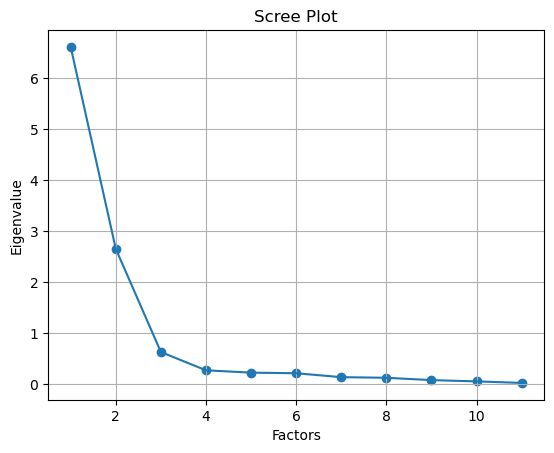

In [7]:


eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), eigen_values)
plt.plot(range(1, df.shape[1]+1), eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()



In [8]:
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(df)

C:\Users\alasm\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [9]:
loadings = pd.DataFrame(fa.loadings_, index=df.columns, columns=['Factor1', 'Factor2','Factor3'])
print(loadings)

       Factor1   Factor2   Factor3
mpg   0.664678 -0.446785 -0.488240
cyl  -0.627468  0.695738  0.282671
disp -0.717999  0.536825  0.301686
hp   -0.305103  0.681623  0.557019
drat  0.806782 -0.237814 -0.063683
wt   -0.784051  0.246917  0.481970
qsec -0.176934 -0.933752 -0.212663
vs    0.289355 -0.797606 -0.231490
am    0.892181  0.106374 -0.082767
gear  0.897917  0.005800  0.245281
carb  0.092934  0.507064  0.774278


In [10]:
variance = fa.get_factor_variance()
print(variance)


(array([4.43566747, 3.33051271, 1.72124882]), array([0.4032425 , 0.30277388, 0.15647717]), array([0.4032425 , 0.70601638, 0.86249355]))


In [11]:
factor_scores = fa.transform(df) 
factor_scores_df = pd.DataFrame(factor_scores, columns=['Factor1', 'Factor2','Factor3'])
print(factor_scores_df.head())

    Factor1   Factor2   Factor3
0  0.889551  0.714905 -0.202932
1  0.759223  0.452291  0.037758
2  0.689007 -0.552857 -0.627795
3 -0.867423 -0.630658 -0.852553
4 -0.863142  0.907046 -1.007371


C:\Users\alasm\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
